In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

date_parser= lambda x:datetime.strptime(x, '%Y/%m/%d %H:%M:%S:%f')
df = pd.read_csv('VI09_2024-07-07_01-00-00_gg-44_int-2_th.csv', sep=';', parse_dates= ['time'], date_parser=date_parser, index_col='time')

#pd.to_datetime(df.index, unit='L')



/var/folders/d7/dj_4mq8d06360634vn1zgy8w0000gn/T/ipykernel_64023/1976413250.py:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv('VI09_2024-07-07_01-00-00_gg-44_int-2_th.csv', sep=';', parse_dates= ['time'], date_parser=date_parser, index_col='time')


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 720000 entries, 2024-07-07 01:00:00 to 2024-07-07 01:59:59.995000
Columns: 106 entries, 03067802_z to 03068174_z
dtypes: float64(106)
memory usage: 587.8 MB


In [3]:
df.columns



Index(['03067802_z', '03067806_z', '03067807_z', '03067809_z', '0306780C_z',
       '0306780D_z', '0306781A_z', '03067820_z', '03067826_z', '0306782A_z',
       ...
       '03067A79_z', '03067A7D_z', '03067AB3_z', '03067AB4_z', '03067AB8_z',
       '03067AB9_z', '0306807F_z', '030680B5_z', '030680D0_z', '03068174_z'],
      dtype='object', length=106)

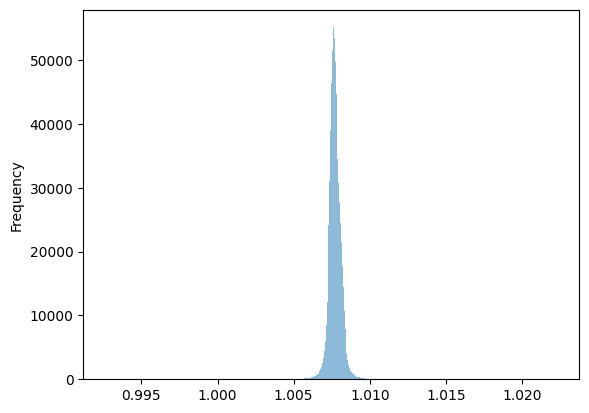

In [91]:

ax = df['03067802_z'].plot.hist(bins=500, alpha=0.5)

In [4]:
df2 = df.resample('T').mean()
df2 = pd.DataFrame(df2)
df2.shape
print(df2)

                     03067802_z  03067806_z  03067807_z  03067809_z  \
time                                                                  
2024-07-07 01:00:00    1.007728    1.009114    1.010653    0.994330   
2024-07-07 01:01:00    1.007718    1.009101    1.010659    0.994323   
2024-07-07 01:02:00    1.007712    1.009111    1.010654    0.994325   
2024-07-07 01:03:00    1.007712    1.009115    1.010651    0.994325   
2024-07-07 01:04:00    1.007712    1.009108    1.010659    0.994337   
2024-07-07 01:05:00    1.007709    1.009106    1.010652    0.994324   
2024-07-07 01:06:00    1.007714    1.009106    1.010647    0.994330   
2024-07-07 01:07:00    1.007719    1.009108    1.010649    0.994319   
2024-07-07 01:08:00    1.007716    1.009108    1.010651    0.994326   
2024-07-07 01:09:00    1.007717    1.009105    1.010659    0.994321   
2024-07-07 01:10:00    1.007720    1.009114    1.010658    0.994328   
2024-07-07 01:11:00    1.007729    1.009112    1.010649    0.994326   
2024-0

<AxesSubplot: xlabel='time'>

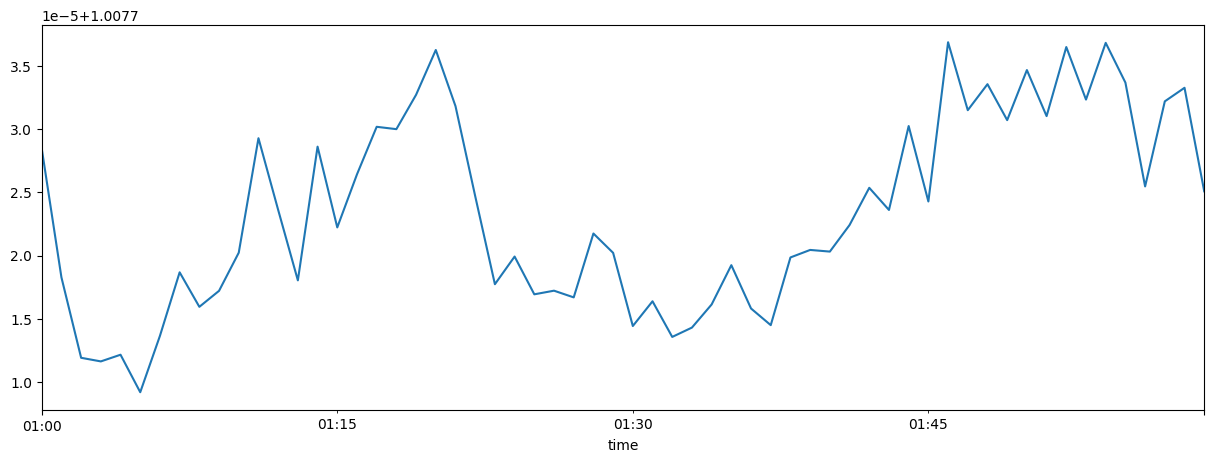

In [14]:
df2.head()
df2['03067802_z'].plot(figsize=(15,5))


In [17]:
#simple movinng average with rolling window
df2['first sensor: 5 window r0lling'] = df2['03067802_z'].rolling(window=5, min_periods=2).mean()

<AxesSubplot: xlabel='time'>

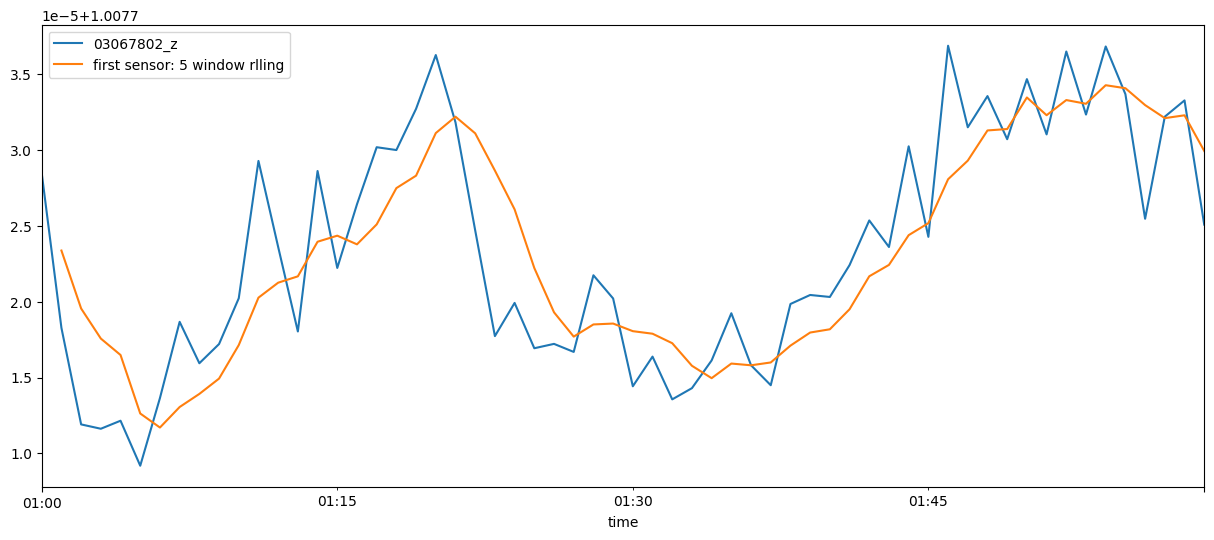

In [19]:
df2[['03067802_z','first sensor: 5 window rlling']].plot(figsize=(15,6))

<AxesSubplot: xlabel='time'>

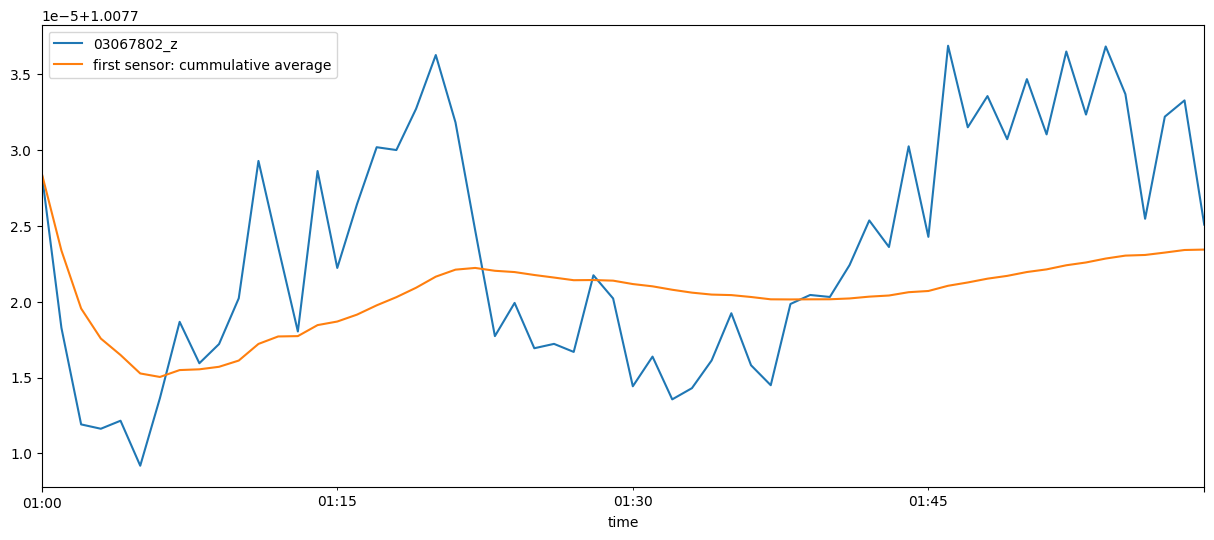

In [21]:
#cummulative moving average (expanding)

df2['first sensor: cummulative average'] = df2['03067802_z'].expanding().mean()

df2[['03067802_z','first sensor: cummulative average']].plot(figsize=(15,6))

<AxesSubplot: xlabel='time'>

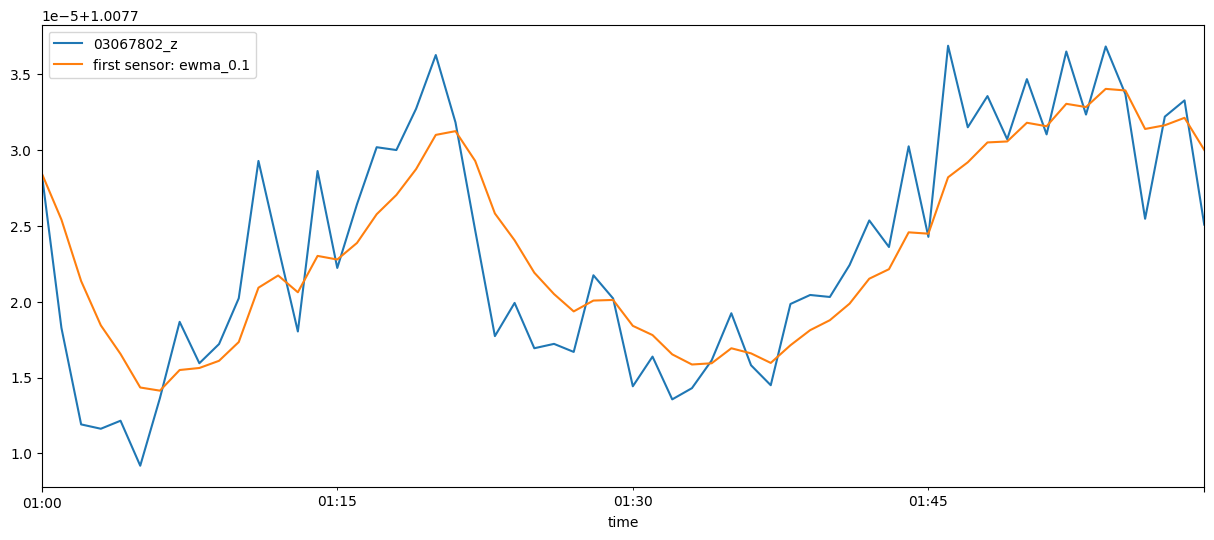

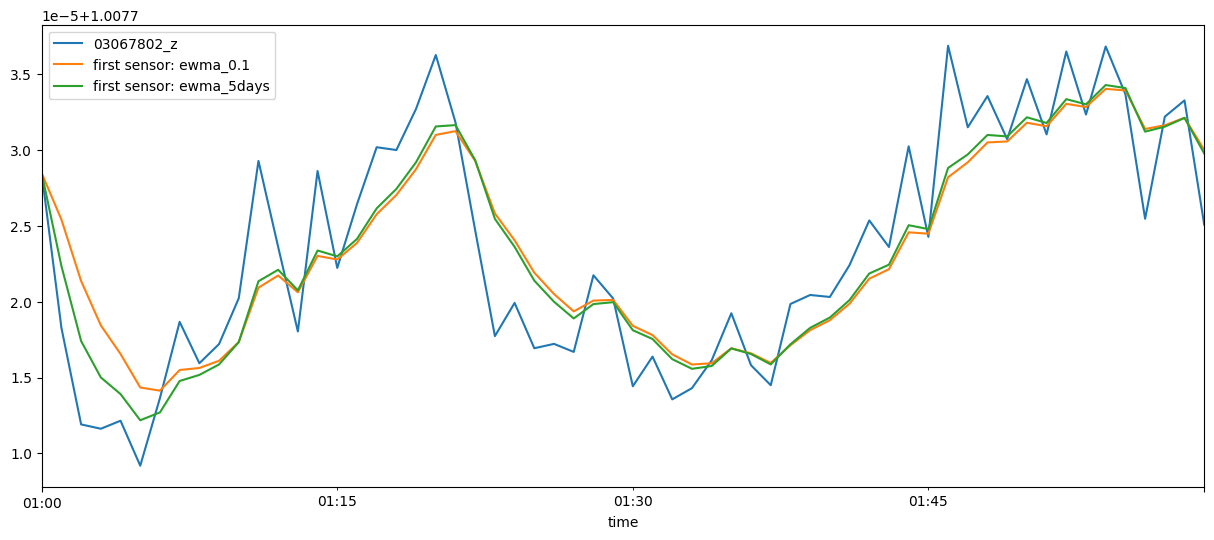

In [29]:
#exponential moving average _EWMA-ewma
#with a smoothinf factor alpha = 0.1
df2['first sensor: ewma_0.1'] = df2['03067802_z'].ewm(alpha=0.3, adjust = False).mean()

df2[['03067802_z','first sensor: ewma_0.1']].plot(figsize=(15,6))

#using span parameter which is the multiplaction factor 2/(window+1), lets say window =5

df2['first sensor: ewma_5days'] = df2['03067802_z'].ewm(span=5).mean()

df2[['03067802_z','first sensor: ewma_0.1', 'first sensor: ewma_5days']].plot(figsize=(15,6))



In [ ]:
df2.tail()

<AxesSubplot: ylabel='Frequency'>

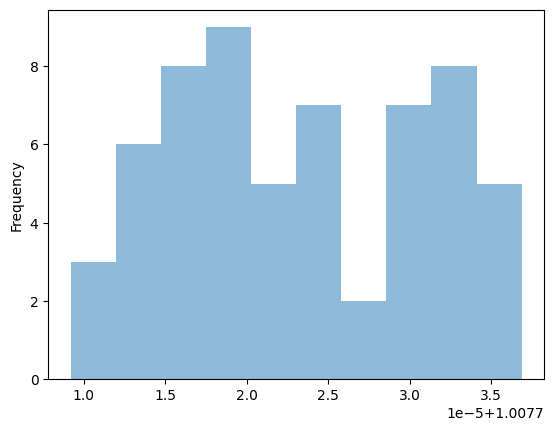

In [30]:


df2['03067802_z'].plot.hist(bins=10, alpha=0.5)

In [32]:
dr= pd.date_range('2024-07-07 00:00:00', '2024-07-07 00:19:59.995', freq='s')
df_20min = pd.DataFrame(dr)
df_20min

,0
0,2024-07-07 00:00:00
1,2024-07-07 00:00:01
2,2024-07-07 00:00:02
3,2024-07-07 00:00:03
4,2024-07-07 00:00:04
...,...
1195,2024-07-07 00:19:55
1196,2024-07-07 00:19:56
1197,2024-07-07 00:19:57
1198,2024-07-07 00:19:58
